In [2]:
# Imports
import scipy.io as sio
import matplotlib.pyplot as plt
import sys
import numpy as np
import h5py
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization
from keras import backend as K
from keras import regularizers

sys.path.append("../") # go to parent dir

## Loading datasets

In [3]:
X_train = np.load('../data/pred_image_semantics/X_trainVal.npy')
Y_train = np.load('../data/pred_image_semantics/Y_trainVal.npy')
imageids_train = np.load('../data/pred_image_semantics/imageids_trainVal.npy')
X_test = np.load('../data/pred_image_semantics/X_test.npy')
Y_test = np.load('../data/pred_image_semantics/Y_test.npy')
imageids_test = np.load('../data/pred_image_semantics/imageids_test.npy')

X_val = np.load('../data/pred_image_semantics/X_test.npy')
Y_val = np.load('../data/pred_image_semantics/Y_test.npy')
imageids_test = np.load('../data/pred_image_semantics/imageids_test.npy')

In [15]:
X_train.shape[1]

17600

## Neural Network Prediction

In [4]:
model = None

In [10]:
# Resetting model (to be able to work in Jupyter)
session = K.get_session()
if model is not None:
    model.reset_states()
    
# Defining variables
num_features = X_train.shape[1]
num_classes = Y_train.shape[1]
num_neurons_l1 = 10000
num_neurons_l2 = 10000
num_layers = 2
batch_size = 64
num_epochs = 5

def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1))

# Defining the model
model = Sequential()

# Adding dense layers
print('Creating layer', 1)
model.add(Dense(units = num_neurons_l1, input_dim = num_features, activation = 'relu', kernel_regularizer = regularizers.l2(0.01), name = 'layer1'))

model.add(BatchNormalization())

# Adding dense layers
print('Creating layer', 2)
model.add(Dense(units = num_neurons_l2, activation = 'relu', kernel_regularizer = regularizers.l2(0.01), name = 'layer2'))
#kernel_regularizer = regularizers.l2(0.005),

model.add(BatchNormalization())
# then we add a new Dense layer with the size of the image semantics vectors
print('Creating output layer')
model.add(Dense(units = num_classes, name='output_layer'))

model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=[rmse, 'accuracy'])

Creating layer 1
Creating layer 2
Creating output layer


In [11]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 10000)             176010000 
_________________________________________________________________
batch_normalization_5 (Batch (None, 10000)             40000     
_________________________________________________________________
layer2 (Dense)               (None, 10000)             100010000 
_________________________________________________________________
batch_normalization_6 (Batch (None, 10000)             40000     
_________________________________________________________________
output_layer (Dense)         (None, 2048)              20482048  
Total params: 296,582,048
Trainable params: 296,542,048
Non-trainable params: 40,000
_________________________________________________________________
None


## Test set

In [12]:
train_history = model.fit(X_train, Y_train,
          validation_data = (X_val, Y_val),
          epochs=num_epochs, 
          batch_size=batch_size)

Train on 9660 samples, validate on 345 samples
Epoch 1/5


ResourceExhaustedError: OOM when allocating tensor of shape [10000,10000] and type float
	 [[Node: training_1/Adam/zeros_4 = Const[dtype=DT_FLOAT, value=Tensor<type: float shape: [10000,10000] values: [0 0 0]...>, _device="/job:localhost/replica:0/task:0/device:GPU:0"]()]]

Caused by op 'training_1/Adam/zeros_4', defined at:
  File "c:\users\dea\anaconda3\envs\tensorflowgpu\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "c:\users\dea\anaconda3\envs\tensorflowgpu\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "c:\users\dea\anaconda3\envs\tensorflowgpu\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "c:\users\dea\anaconda3\envs\tensorflowgpu\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "c:\users\dea\anaconda3\envs\tensorflowgpu\lib\site-packages\ipykernel\kernelapp.py", line 486, in start
    self.io_loop.start()
  File "c:\users\dea\anaconda3\envs\tensorflowgpu\lib\site-packages\tornado\platform\asyncio.py", line 127, in start
    self.asyncio_loop.run_forever()
  File "c:\users\dea\anaconda3\envs\tensorflowgpu\lib\asyncio\base_events.py", line 421, in run_forever
    self._run_once()
  File "c:\users\dea\anaconda3\envs\tensorflowgpu\lib\asyncio\base_events.py", line 1425, in _run_once
    handle._run()
  File "c:\users\dea\anaconda3\envs\tensorflowgpu\lib\asyncio\events.py", line 127, in _run
    self._callback(*self._args)
  File "c:\users\dea\anaconda3\envs\tensorflowgpu\lib\site-packages\tornado\platform\asyncio.py", line 117, in _handle_events
    handler_func(fileobj, events)
  File "c:\users\dea\anaconda3\envs\tensorflowgpu\lib\site-packages\tornado\stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "c:\users\dea\anaconda3\envs\tensorflowgpu\lib\site-packages\zmq\eventloop\zmqstream.py", line 450, in _handle_events
    self._handle_recv()
  File "c:\users\dea\anaconda3\envs\tensorflowgpu\lib\site-packages\zmq\eventloop\zmqstream.py", line 480, in _handle_recv
    self._run_callback(callback, msg)
  File "c:\users\dea\anaconda3\envs\tensorflowgpu\lib\site-packages\zmq\eventloop\zmqstream.py", line 432, in _run_callback
    callback(*args, **kwargs)
  File "c:\users\dea\anaconda3\envs\tensorflowgpu\lib\site-packages\tornado\stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "c:\users\dea\anaconda3\envs\tensorflowgpu\lib\site-packages\ipykernel\kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "c:\users\dea\anaconda3\envs\tensorflowgpu\lib\site-packages\ipykernel\kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "c:\users\dea\anaconda3\envs\tensorflowgpu\lib\site-packages\ipykernel\kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "c:\users\dea\anaconda3\envs\tensorflowgpu\lib\site-packages\ipykernel\ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "c:\users\dea\anaconda3\envs\tensorflowgpu\lib\site-packages\ipykernel\zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "c:\users\dea\anaconda3\envs\tensorflowgpu\lib\site-packages\IPython\core\interactiveshell.py", line 2662, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "c:\users\dea\anaconda3\envs\tensorflowgpu\lib\site-packages\IPython\core\interactiveshell.py", line 2785, in _run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "c:\users\dea\anaconda3\envs\tensorflowgpu\lib\site-packages\IPython\core\interactiveshell.py", line 2903, in run_ast_nodes
    if self.run_code(code, result):
  File "c:\users\dea\anaconda3\envs\tensorflowgpu\lib\site-packages\IPython\core\interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-12-f26f1c8d9c26>", line 4, in <module>
    batch_size=batch_size)
  File "c:\users\dea\anaconda3\envs\tensorflowgpu\lib\site-packages\keras\models.py", line 963, in fit
    validation_steps=validation_steps)
  File "c:\users\dea\anaconda3\envs\tensorflowgpu\lib\site-packages\keras\engine\training.py", line 1682, in fit
    self._make_train_function()
  File "c:\users\dea\anaconda3\envs\tensorflowgpu\lib\site-packages\keras\engine\training.py", line 990, in _make_train_function
    loss=self.total_loss)
  File "c:\users\dea\anaconda3\envs\tensorflowgpu\lib\site-packages\keras\legacy\interfaces.py", line 91, in wrapper
    return func(*args, **kwargs)
  File "c:\users\dea\anaconda3\envs\tensorflowgpu\lib\site-packages\keras\optimizers.py", line 457, in get_updates
    ms = [K.zeros(K.int_shape(p), dtype=K.dtype(p)) for p in params]
  File "c:\users\dea\anaconda3\envs\tensorflowgpu\lib\site-packages\keras\optimizers.py", line 457, in <listcomp>
    ms = [K.zeros(K.int_shape(p), dtype=K.dtype(p)) for p in params]
  File "c:\users\dea\anaconda3\envs\tensorflowgpu\lib\site-packages\keras\backend\tensorflow_backend.py", line 692, in zeros
    v = tf.zeros(shape=shape, dtype=tf_dtype, name=name)
  File "c:\users\dea\anaconda3\envs\tensorflowgpu\lib\site-packages\tensorflow\python\ops\array_ops.py", line 1601, in zeros
    output = fill(shape, constant(zero, dtype=dtype), name=name)
  File "c:\users\dea\anaconda3\envs\tensorflowgpu\lib\site-packages\tensorflow\python\ops\gen_array_ops.py", line 3032, in fill
    "Fill", dims=dims, value=value, name=name)
  File "c:\users\dea\anaconda3\envs\tensorflowgpu\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "c:\users\dea\anaconda3\envs\tensorflowgpu\lib\site-packages\tensorflow\python\framework\ops.py", line 3290, in create_op
    op_def=op_def)
  File "c:\users\dea\anaconda3\envs\tensorflowgpu\lib\site-packages\tensorflow\python\framework\ops.py", line 1654, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

ResourceExhaustedError (see above for traceback): OOM when allocating tensor of shape [10000,10000] and type float
	 [[Node: training_1/Adam/zeros_4 = Const[dtype=DT_FLOAT, value=Tensor<type: float shape: [10000,10000] values: [0 0 0]...>, _device="/job:localhost/replica:0/task:0/device:GPU:0"]()]]


In [19]:
#loss, accuracy = model.evaluate(X_test, 
#                                utils.onehot(targets_test, num_classes), 
#                                batch_size=32)

In [8]:
Y_pred = model.predict(X_test, batch_size=batch_size)

In [9]:
MSE = mean_squared_error(Y_pred,Y_test)
MSE

0.09714864

In [10]:
Y_predt = np.transpose(Y_pred)
Y_testt = np.transpose(Y_test)
E_nul_values = np.var(Y_test, 0)

# Calculating MSE across the images for each location of the 2048 image semantic locations
E_values = []
for i in range(len(Y_predt)):
    e = mean_squared_error(Y_testt, Y_predt)
    E_values.append(e)

E_delta = np.divide(E_values,E_nul_values)
sum(E_delta < 1)

650

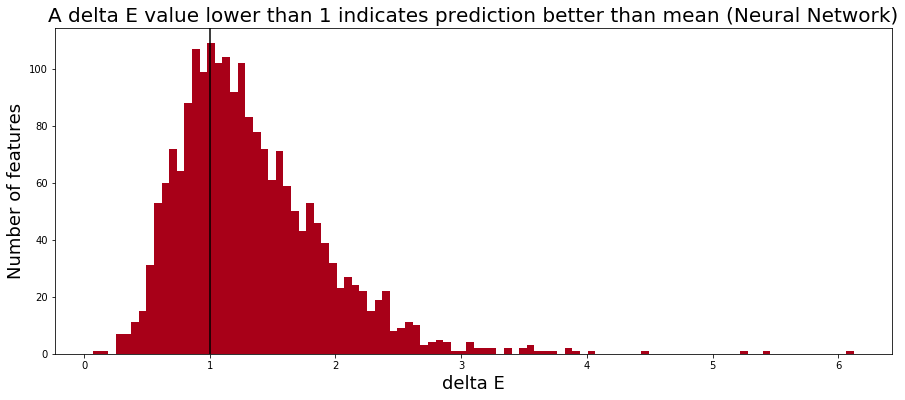

In [11]:
plt.figure(figsize=(15,6))
plt.hist(E_delta, bins = 100, color = '#a80018')
plt.axvline(x=1, color = 'black')
plt.title('A delta E value lower than 1 indicates prediction better than mean (Neural Network)', fontsize = 20)
plt.xlabel('delta E', fontsize = 18)
plt.ylabel('Number of features', fontsize = 18)
plt.show()

## Predictable features

In [ ]:
map_predictable_val = []

for i in range(len(E_delta)):
    if E_delta[i] < 1:
        map_predictable_val.append(True)
    else:
        map_predictable_val.append(False)
        
map_predictable_val = np.array(map_predictable_val)

In [ ]:
# Cheking how many of the same features can be predicted for test and validation set
count = 0
for i in range(len(map_predictable_val)):
    if (map_predictable[i] == True) & (map_predictable_val[i] == True):
        count += 1
        
print('Number of features shared between validation set and test set that can be predicted: ' + str(count))

In [ ]:
# Plotting true and pred against each other
plt.figure(figsize=(20,6))
plt.plot(range(2048), Y_val[300], color = 'black')
plt.plot(range(2048), Y_pred_NN[300], color = '#a80018')
plt.title('Predicted feature values vs. true feature values - Neural Network', fontsize = 20)
plt.xlabel('Features', fontsize = 18)
plt.ylabel('Values', fontsize = 18)
plt.legend(['True', 'Predicted'])
plt.show()

## Saving Y_pred to a h5 file

In [ ]:
# Creates a h5 file
f = h5py.File('../data/pred_image_semantics/pred_nn' + '.h5', 'a')

# adds data to the file
for i in range(len(Y_pred)):
    f["%s" % imageids_test[i]] = Y_pred[i]
    
# Close the file
f.close()